In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/joshi/Downloads/breast-cancer-wisconsin-data.csv")

In [9]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
    data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})
    data.dropna(inplace=True)
    X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [12]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))



Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
ROC AUC Score: 0.996031746031746


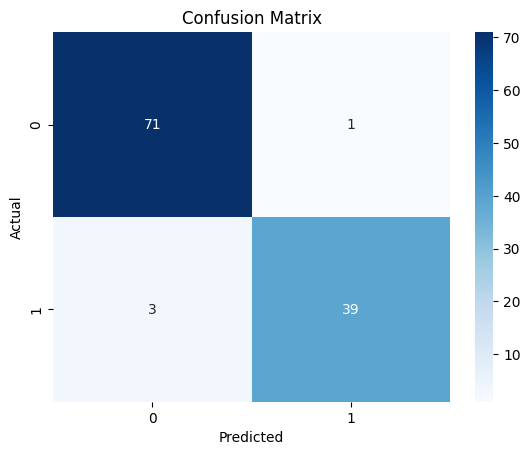

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

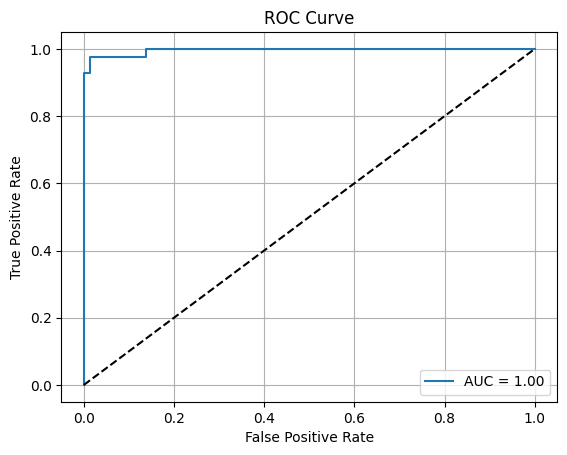

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [16]:
custom_threshold = 0.3
y_pred_custom = (y_probs >= custom_threshold).astype(int)
print(f"\nUsing custom threshold = {custom_threshold}")
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Using custom threshold = 0.3
Precision: 0.9761904761904762
Recall: 0.9761904761904762
